# Criando a análise dos dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o dataset
df = pd.read_csv('2006.csv')

# Mostrar as primeiras linhas para confirmar o carregamento dos dados
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2006,4,10,1,1405.0,1410,1456.0,1505,MQ,3503,...,2,8,0,NaN,0,0,0,0,0,0
1,2006,1,3,2,1344.0,1321,2116.0,2100,DL,461,...,4,14,0,NaN,0,5,0,0,0,11
2,2006,11,26,7,1810.0,1725,2107.0,2025,WN,2308,...,4,32,0,NaN,0,0,0,6,0,36
3,2006,1,25,3,2326.0,2323,737.0,731,AS,10,...,6,9,0,NaN,0,0,0,0,0,0
4,2006,8,11,5,1409.0,1410,1628.0,1632,US,1038,...,3,10,0,NaN,0,0,0,0,0,0


## 01: Quantidade de atrasos de uma companhia específica

- A análise da quantidade de atrasos por companhia pode revelar quais companhias têm maior dificuldade em manter seus horários. Por exemplo, se a Delta Air Lines (DL) tiver um número significativamente maior de atrasos em comparação com outras companhias, isso pode indicar problemas operacionais específicos dessa companhia.

Isso é verdade?

In [2]:
def contar_atrasos_por_companhia(companhia):
    atrasos = df[(df['UniqueCarrier'] == companhia) & (df['ArrDelay'] > 0)]
    return len(atrasos)

# Chamando a função
companhia = 'DL'  # Delta Air Lines
contar_atrasos_por_companhia(companhia)

2266

In [3]:
def top_5_companhias_maior_quantidade_atrasos(df):
    # Filtrar os voos com atraso na chegada
    voos_com_atraso = df[df['ArrDelay'] > 0]
    
    # Agrupar por companhia aérea e contar o número de voos com atraso
    quantidade_atrasos_por_companhia = voos_com_atraso.groupby('UniqueCarrier')['ArrDelay'].count()
    
    # Se quiser em minutos
    #atrasos_por_companhia = voos_com_atraso.groupby('UniqueCarrier')['ArrDelay'].sum()

    
    # Ordenar em ordem decrescente e selecionar as 5 companhias com mais atrasos
    top_5 = quantidade_atrasos_por_companhia.sort_values(ascending=False).head(5)
    
    return top_5

# Chamando a função
top_5_companhias_maior_quantidade_atrasos(df)

UniqueCarrier
WN    4213
AA    2765
MQ    2475
OO    2399
US    2381
Name: ArrDelay, dtype: int64

## 02: Maior Atraso na Chegada (Q-02) e Saída (Q-03):

- Identificar os voos com os maiores atrasos na chegada e na saída ajuda a destacar possíveis gargalos ou problemas específicos de rotas ou aeroportos. Esses voos extremos podem ser investigados para entender o que causou tais atrasos (por exemplo, condições meteorológicas, problemas técnicos, congestionamento aeroportuário).

In [4]:
# Maior atraso na chegada
#voo_maior_atraso_chegada = df[df['ArrDelay'] == df['ArrDelay'].max()]
#voo_maior_atraso_chegada[['UniqueCarrier', 'FlightNum', 'Origin', 'Dest', 'ArrDelay']]

# Maior atraso na saída
voo_maior_atraso_saida = df[df['DepDelay'] == df['DepDelay'].max()]
voo_maior_atraso_saida[['UniqueCarrier', 'FlightNum', 'Origin', 'Dest', 'DepDelay']]


,UniqueCarrier,FlightNum,Origin,Dest,DepDelay
433,B6,740,PSE,JFK,792.0


## 04: Voo mais longo

- O voo mais longo em termos de distância pode ajudar a entender as rotas mais extenuantes operadas pelas companhias aéreas. A análise desses voos pode levar à otimização das operações e do planejamento de voos longos.

In [5]:
voo_mais_longo = df[df['Distance'] == df['Distance'].max()]
voo_mais_longo[['UniqueCarrier', 'FlightNum', 'Origin', 'Dest', 'Distance']]

,UniqueCarrier,FlightNum,Origin,Dest,Distance
7129,DL,317,ATL,HNL,4502
8717,DL,1282,HNL,ATL,4502
17235,DL,1282,HNL,ATL,4502
51741,DL,855,ATL,HNL,4502


## 05: Quantidade de voos redirecionados (Diverted)

- O número de voos redirecionados (Diverted) pode indicar a frequência de problemas que forçam mudanças de rota, o que pode estar relacionado a problemas meteorológicos, congestionamentos ou até mesmo emergências. Reduzir a necessidade de redirecionamento pode ser um objetivo de melhoria operacional.

Qual a quantidade total de voos redirecionados por companhia aérea?

Qual a porcentagem total?

Qual o aeroporto que mais redireciona?

In [6]:
voos_redirecionados = len(df[df['Diverted'] == 1])
voos_redirecionados

133

In [7]:
# Quantidade total de voos por companhia aérea

def quantidade_total_voos_por_companhia(df):
    # Agrupar por companhia aérea e contar o número de voos
    total_voos_por_companhia = df.groupby('UniqueCarrier')['FlightNum'].count()
    
    return total_voos_por_companhia

# Chamando a função
quantidade_total_voos_por_companhia(df).sum()

71419

In [10]:
# Porcentagem de voos redirecionados
def porcentagem_voos_redirecionados(df):
    # Calcular a porcentagem de voos redirecionados
    total_voos = len(df)
    total_redirecionados = len(df[df['Diverted'] == 1])
    porcentagem = (total_redirecionados / total_voos) * 100
    return porcentagem

# Chamando a função
aeroporto_mais_redireciona, quantidade_redirecionamentos = aeroporto_mais_redireciona(df)
print(f"Aeroporto que mais redireciona: {aeroporto_mais_redireciona} com {quantidade_redirecionamentos} redirecionamentos")

Aeroporto que mais redireciona: ATL com 11 redirecionamentos


In [9]:
# Aeroporto que mais redireciona
def aeroporto_mais_redireciona(df):
    # Filtrar apenas os voos redirecionados
    voos_redirecionados = df[df['Diverted'] == 1]
    
    # Agrupar por aeroporto de origem e contar o número de voos redirecionados
    redirecionamentos_por_aeroporto = voos_redirecionados.groupby('Origin')['Diverted'].count()
    
    # Identificar o aeroporto com o maior número de redirecionamentos
    aeroporto_com_mais_redirecionamentos = redirecionamentos_por_aeroporto.idxmax()
    
    return aeroporto_com_mais_redirecionamentos, redirecionamentos_por_aeroporto.loc[aeroporto_com_mais_redirecionamentos]

# # Chamando a função
porcentagem = porcentagem_voos_redirecionados(df)
print(f"Porcentagem de voos redirecionados: {porcentagem:.2f}%")

Porcentagem de voos redirecionados: 0.19%


## 06: Tempo total de atraso para a Delta Air Lines

- Analisar o tempo total de atraso para uma companhia específica, como a Delta Air Lines, fornece uma visão clara do impacto dos atrasos sobre a companhia. Se os atrasos somarem milhares de minutos, isso representa uma perda significativa tanto em termos de custo operacional quanto de satisfação do cliente.

In [12]:
delta_airlines_atrasos = df[(df['UniqueCarrier'] == 'WN') & (df['ArrDelay'] > 0) & df['ArrDelay'].notna()]
tempo_total_atraso_delta = delta_airlines_atrasos['ArrDelay'].sum()
tempo_total_atraso_delta

107653.0

## 07: Tempo total de atrasos na decolagem no aeroporto JFK

- O tempo total de atraso na decolagem do aeroporto JFK pode indicar problemas específicos nesse aeroporto, como congestionamento, problemas de coordenação ou condições meteorológicas adversas frequentes. Medidas podem ser tomadas para mitigar esses atrasos, como otimização do agendamento de voos ou melhorias na infraestrutura.

As condições meteorológicas já foram apontadas algumas vezes durante a análise, vamos verificar então, quais são os meses do ano com maior quantidade de atraso.



In [16]:
atrasos_jfk = df[(df['Origin'] == 'JFK') & (df['DepDelay'] > 0) & df['DepDelay'].notna()]
tempo_total_atraso_jfk = atrasos_jfk['DepDelay'].sum()
tempo_total_atraso_jfk

16065.0

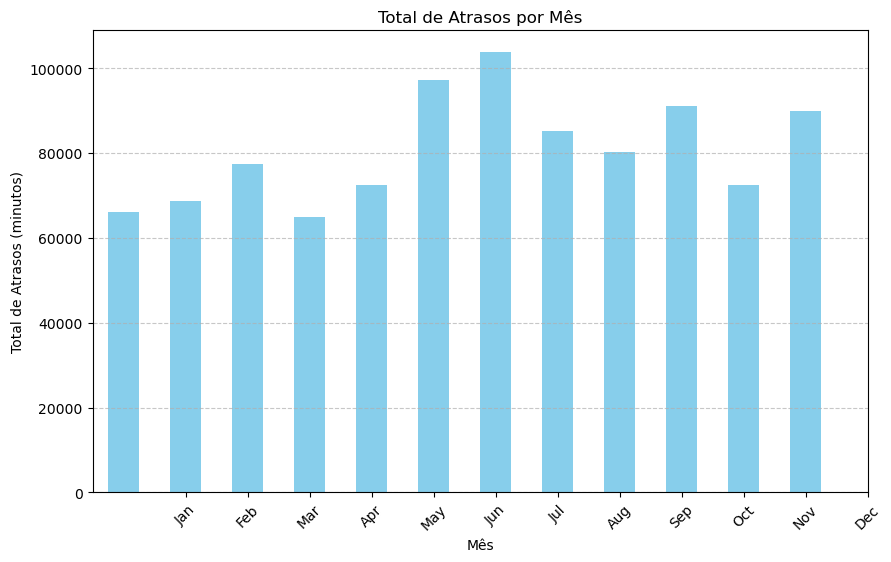

In [17]:
# Adicionar uma coluna para o mês
df['Month'] = df['Month']

# Filtrar voos com atraso na chegada
df_atrasos = df[df['ArrDelay'] > 0]

# Agrupar por mês e calcular a soma dos atrasos
atrasos_por_mes = df_atrasos.groupby('Month')['ArrDelay'].sum()

# Alternativamente, calcular a média dos atrasos por mês
# atrasos_por_mes = df_atrasos.groupby('Month')['ArrDelay'].mean()

# Visualizar os resultados
plt.figure(figsize=(10, 6))
atrasos_por_mes.plot(kind='bar', color='skyblue')
plt.title('Total de Atrasos por Mês')
plt.xlabel('Mês')
plt.ylabel('Total de Atrasos (minutos)')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

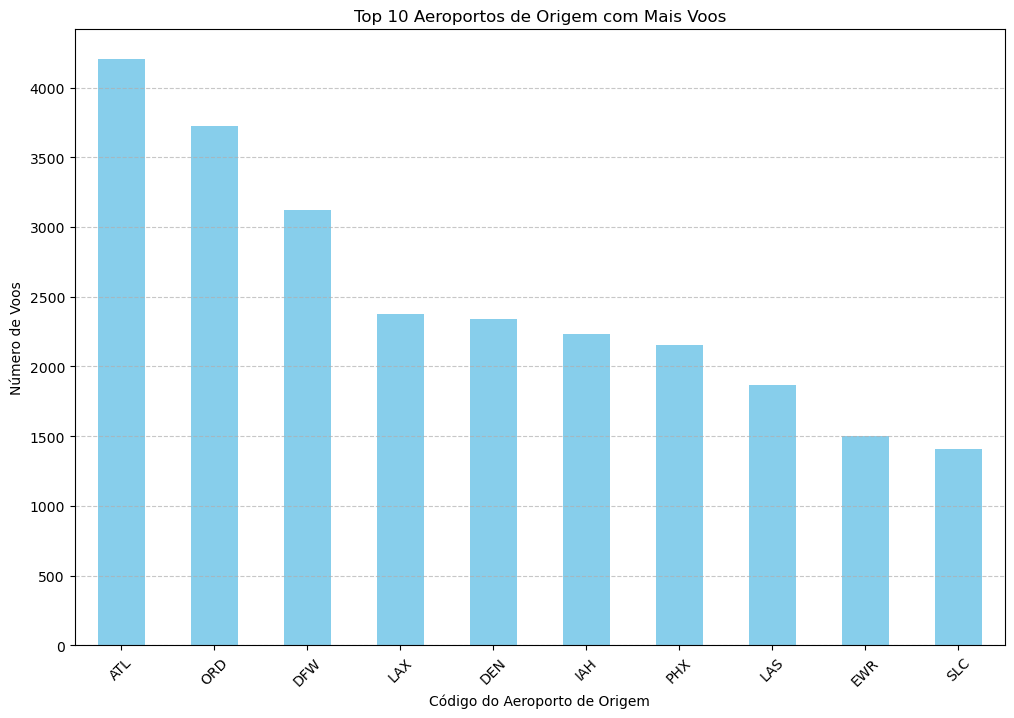

In [18]:
# Contar a quantidade de voos por origem
voos_por_origem = df['Origin'].value_counts()

# Mostrar as 10 origens mais frequentes
top_10_origens = voos_por_origem.head(10)

# Plotar os dados
plt.figure(figsize=(12, 8))
top_10_origens.plot(kind='bar', color='skyblue')
plt.xlabel('Código do Aeroporto de Origem')
plt.ylabel('Número de Voos')
plt.title('Top 10 Aeroportos de Origem com Mais Voos')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Análise das condições climáticas e seu impacto sobre os atrasos dos voos

### Simulação de Dados Meteorológicos

Vou simular um DataFrame weather_df com informações básicas sobre as condições meteorológicas para diferentes dias. Esse DataFrame incluirá colunas como:

- Date: A data para associar com os dados de voos.
- Tempestade: Um indicador binário (0 ou 1) que indica se houve tempestade no dia.
- Visibilidade: Visibilidade em milhas.
- Vento: Velocidade do vento em mph.

In [20]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random

# Configurações para a simulação de dados meteorológicos
date_range = pd.date_range(start=datetime(2006, 1, 1), end=datetime(2006, 12, 31), freq='D')

# Simulando dados meteorológicos
weather_data = {
    "Date": date_range,
    "Tempestade": [random.choice([0, 1]) for _ in range(len(date_range))],
    "Visibilidade": [random.uniform(0.5, 10.0) for _ in range(len(date_range))],
    "Vento": [random.uniform(20, 120) for _ in range(len(date_range))]
}

# Criando o DataFrame
weather_df = pd.DataFrame(weather_data)

# Salvando o DataFrame simulado para uso posterior
weather_df.to_csv('dados_meteorologicos_2006.csv', index=False)

# Visualizar as primeiras linhas do DataFrame meteorológico
weather_df.head()
#weather_df.info()

,Date,Tempestade,Visibilidade,Vento
0,2006-01-01,0,3.504661,109.443167
1,2006-01-02,1,1.421787,113.345856
2,2006-01-03,1,0.583143,106.217124
3,2006-01-04,1,7.318289,99.561340
4,2006-01-05,1,1.210183,32.026897


## Agora, realize os seguintes apontamentos:

 - Análise de Tendências Temporais (Sazonalidade)
 - Impacto das Condições Meteorológicas
 - Análise de Eficiência Operacional
 